In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
datos, metadatos = tfds.load("fashion_mnist", as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.936EIU_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.936EIU_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
datos_entrenamiento = datos["train"]
datos_pruebas = datos["test"]

In [ ]:
nombres_clases = metadatos.features["label"].names

In [ ]:
#Normalizar datos ent y pruebas con una funcion
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes = imagenes/255
  return imagenes, etiquetas

datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#Agregar en cache
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

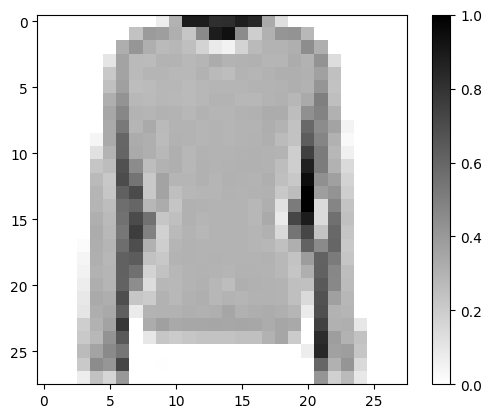

In [ ]:
for imagen, etiqueta in datos_entrenamiento.take(1):
  break

import matplotlib.pyplot as plt

#Mostrarlo en pantalla
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.show()

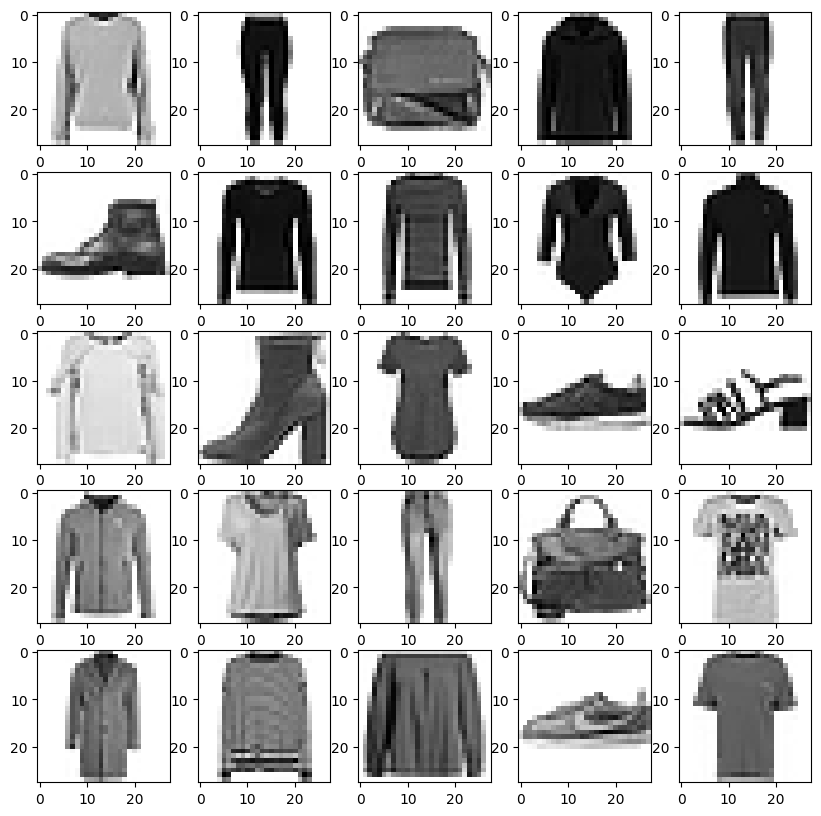

In [ ]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  #Mostrarlo en pantalla
  plt.subplot(5, 5, i+1)
  plt.imshow(imagen, cmap=plt.cm.binary)

plt.show()

In [ ]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modelo.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [ ]:
TAMANO_LOTE = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(60000).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [ ]:
import math

#Entrenar
entrnamiento = modelo.fit(
    datos_entrenamiento, epochs=50,
    steps_per_epoch=math.ceil(60000/TAMANO_LOTE)
)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9631 - loss: 0.0975
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9629 - loss: 0.0927
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9674 - loss: 0.0845
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9700 - loss: 0.0762
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9764 - loss: 0.0633
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9794 - loss: 0.0549
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9793 - loss: 0.0562
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9810 - loss: 0.0510
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9809 - loss: 0.0488
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9828 - loss: 0.0453
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9856 - loss: 0.0395
Epoch 12/50
1875/1875 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


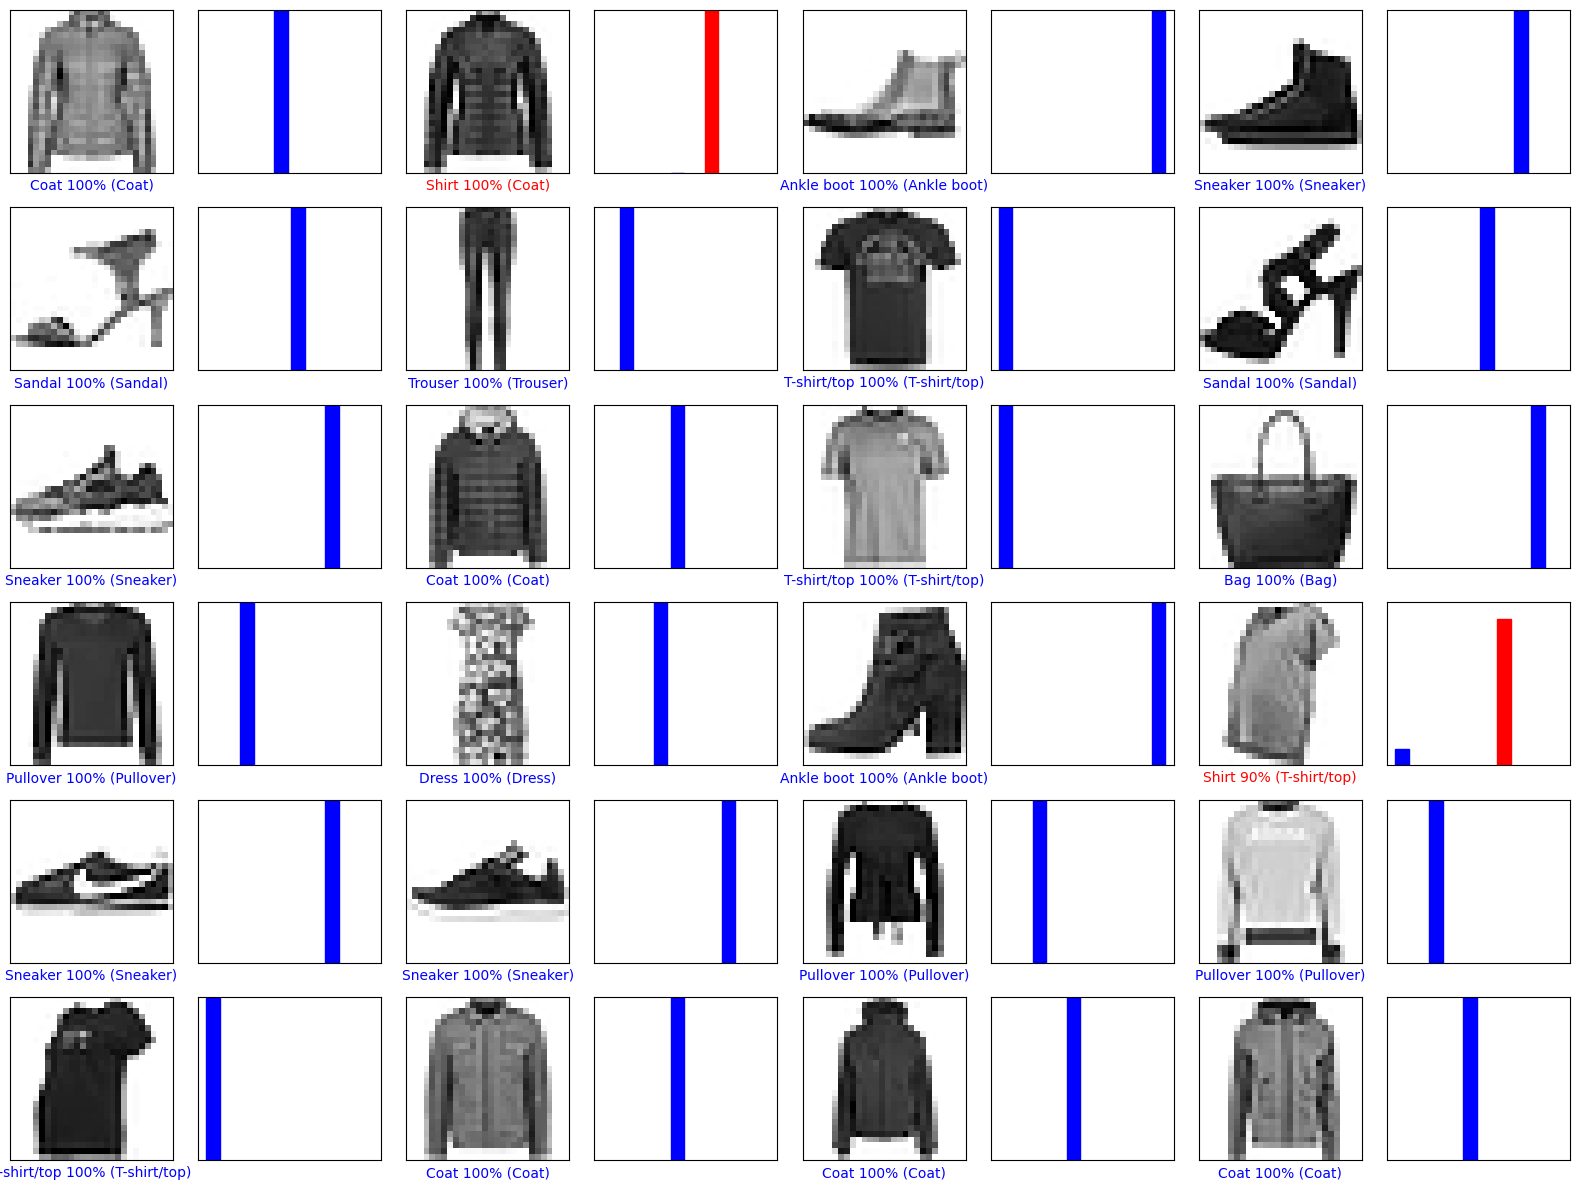

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener las predicciones para el conjunto de pruebas
for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

# Función para graficar una imagen
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[..., 0], cmap=plt.cm.binary)  # Mostrar la imagen en escala de grises

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'  # Correcta
  else:
    color = 'red'  # Incorrecta

  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                       100 * np.max(arr_predicciones),
                                       nombres_clases[etiqueta_real]),
             color=color)

# Función para graficar los valores de predicción (barras)
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1])  # Limitar el eje y

  etiqueta_prediccion = np.argmax(arr_predicciones)

  # Colorear la barra de la predicción y la etiqueta real
  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')

# Parámetros de la cuadrícula
filas = 6
columnas = 4
num_imagenes = filas * columnas

# Mostrar la cuadrícula de imágenes y las gráficas de predicción
plt.figure(figsize=(2 * 2 * columnas, 2 * filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2 * columnas, 2 * i + 1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2 * columnas, 2 * i + 2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

plt.tight_layout()
plt.show()


# **EJERCICIO**

In [ ]:
datos, metadatos = tfds.load("cats_vs_dogs", as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.202OE4_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
metadatos

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, Jo

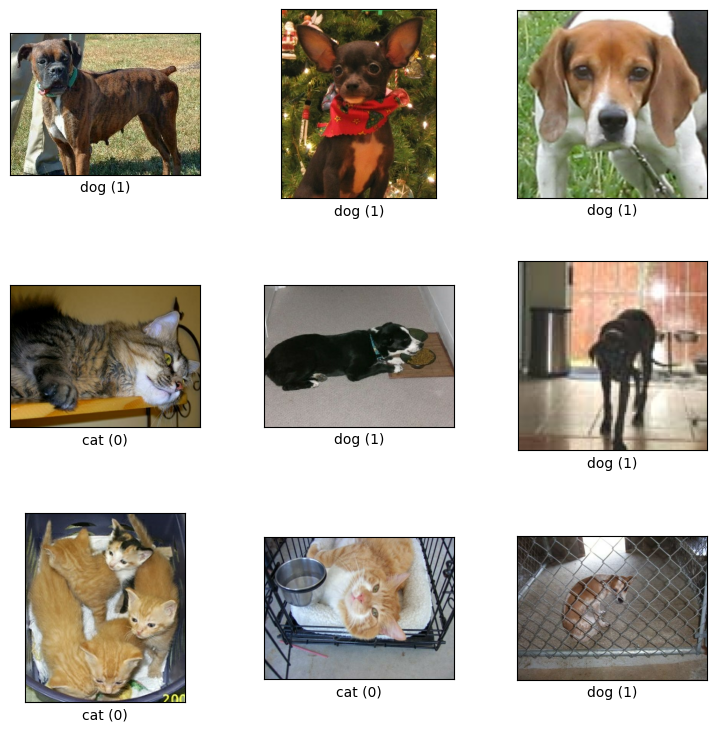

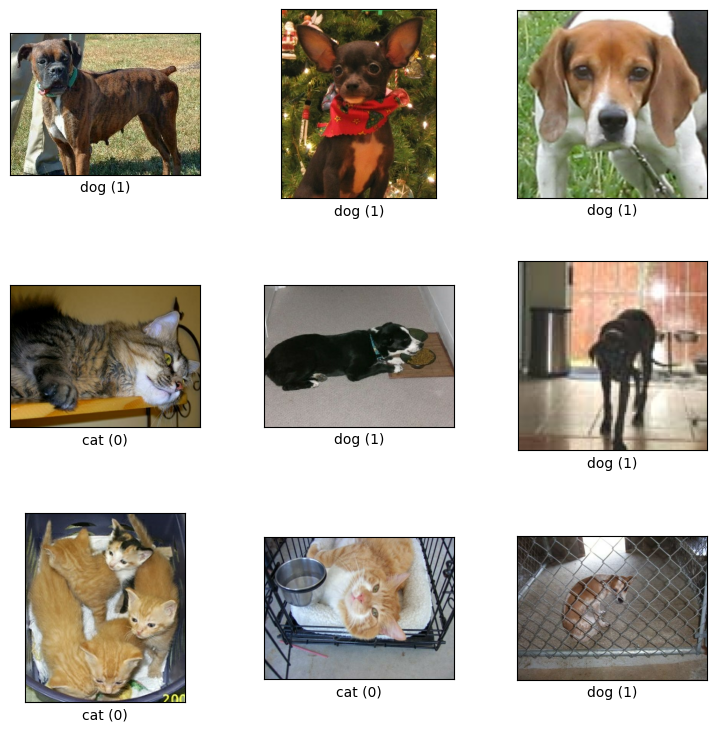

In [ ]:
tfds.show_examples(datos["train"], metadatos)

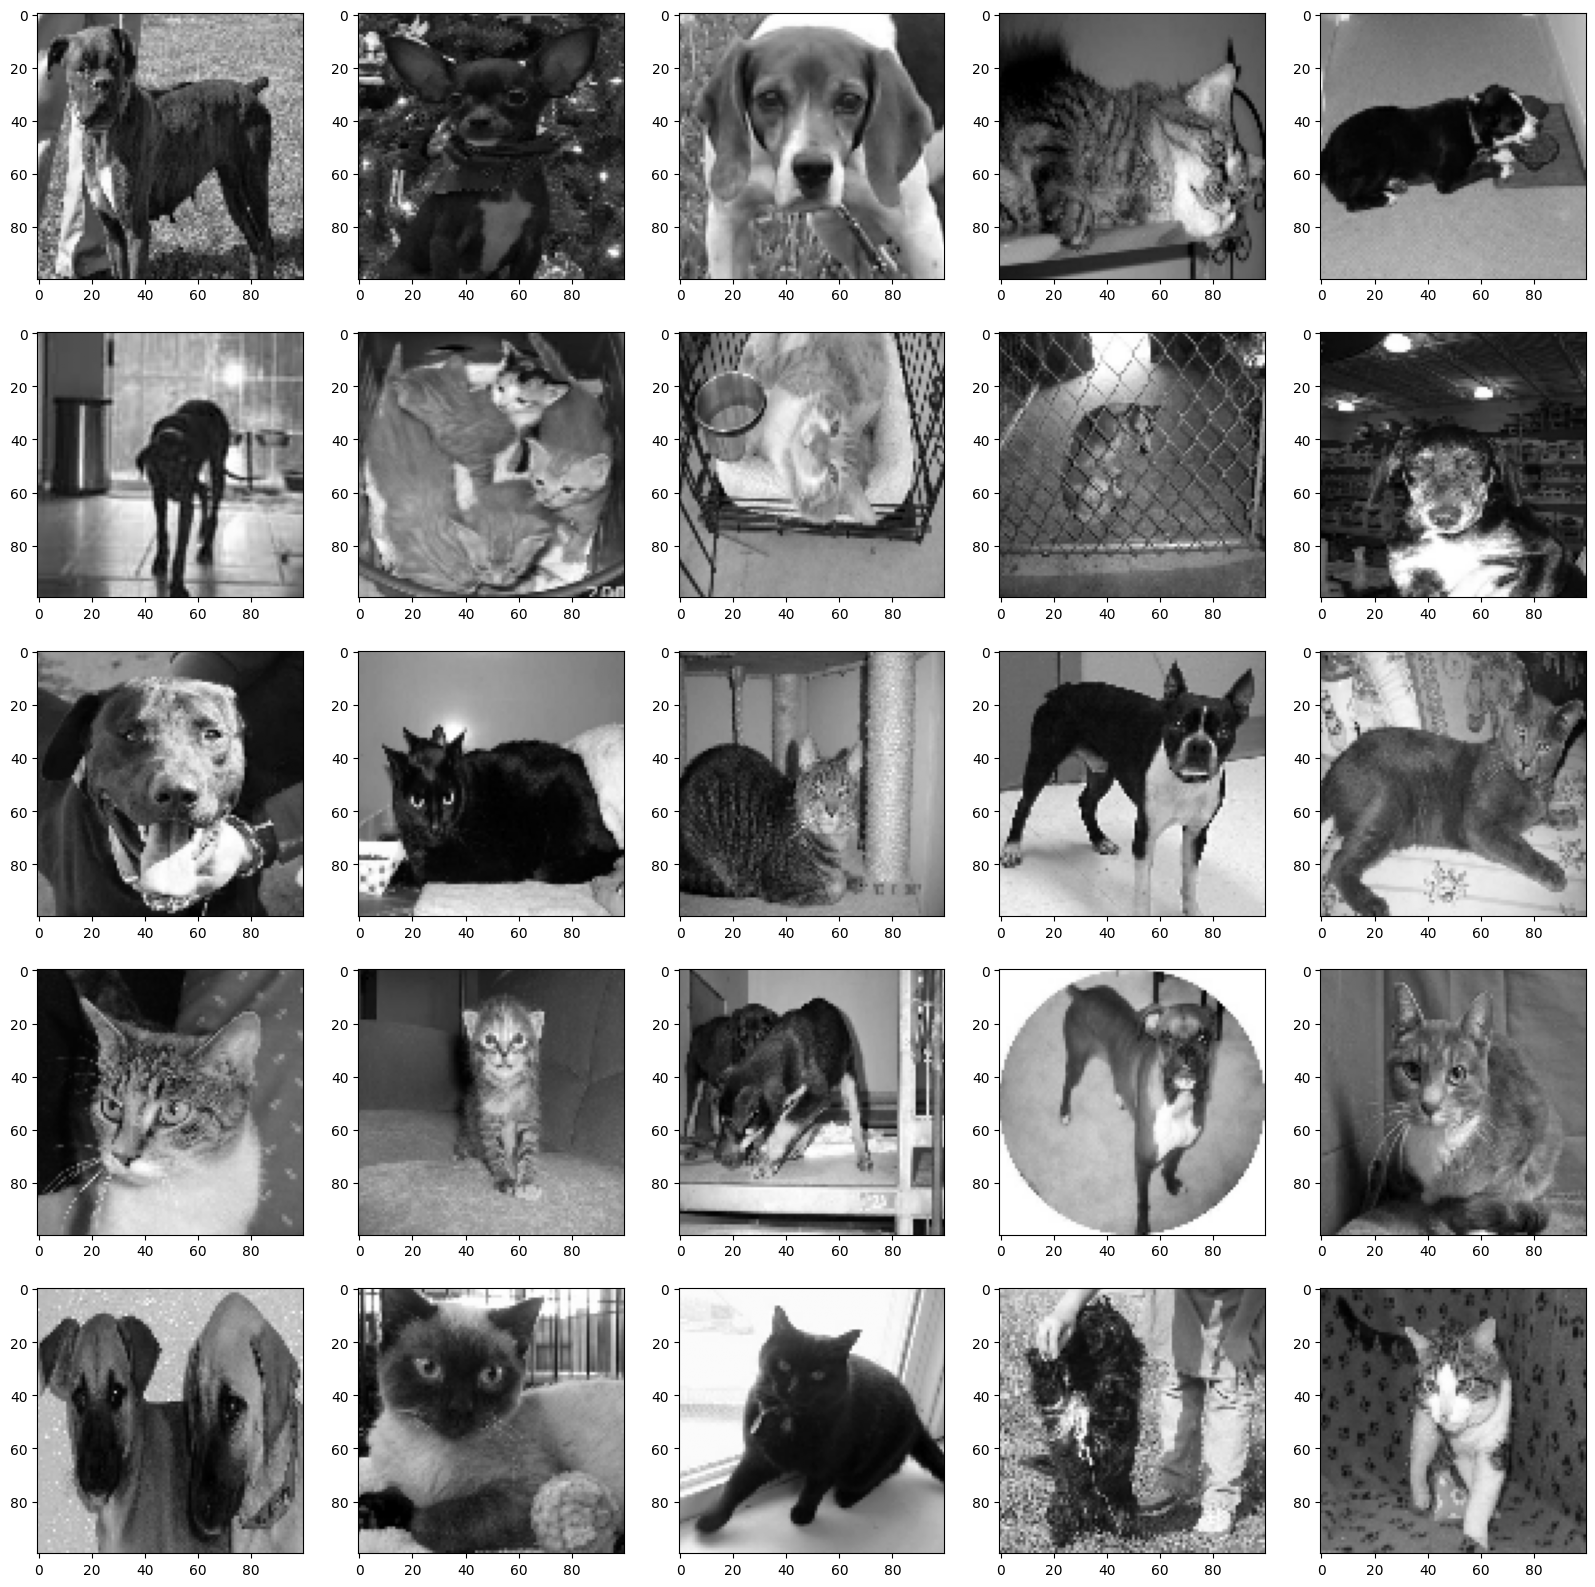

In [ ]:
import matplotlib.pyplot as plt
import cv2 #opencv - trabajar y hacer trnasformaciones en imagenes

plt.figure(figsize=(20,20))

TAMANO_IMG=100

for i, (imagen, etiqueta) in enumerate(datos["train"].take(25)):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.imshow(imagen, cmap="gray")

In [ ]:
datos_entrenamiento = []

In [ ]:
for i, (imagen, etiqueta) in enumerate(datos["train"]):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1)
  datos_entrenamiento.append([imagen, etiqueta])

In [ ]:
datos_entrenamiento[0]

[array([[[249],
         [190],
         [105],
         ...,
         [189],
         [196],
         [143]],
 
        [[232],
         [127],
         [ 88],
         ...,
         [187],
         [180],
         [186]],
 
        [[171],
         [ 87],
         [ 83],
         ...,
         [129],
         [158],
         [166]],
 
        ...,
 
        [[113],
         [173],
         [162],
         ...,
         [143],
         [156],
         [119]],
 
        [[140],
         [152],
         [171],
         ...,
         [ 98],
         [155],
         [154]],
 
        [[ 91],
         [109],
         [167],
         ...,
         [ 46],
         [ 51],
         [ 47]]], dtype=uint8),
 <tf.Tensor: shape=(), dtype=int64, numpy=1>]

In [ ]:
#Preparar variablas X y y

X = []
y = []

for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

In [ ]:
#Normalizar las imagenes
import numpy as np

X = np.array(X).astype(float) / 255

In [ ]:
X[0]

array([[[0.0038293 ],
        [0.00292195],
        [0.00161476],
        ...,
        [0.00290657],
        [0.00301423],
        [0.00219915]],

       [[0.00356786],
        [0.00195309],
        [0.00135333],
        ...,
        [0.00287582],
        [0.00276817],
        [0.00286044]],

       [[0.00262976],
        [0.00133795],
        [0.00127643],
        ...,
        [0.00198385],
        [0.00242983],
        [0.00255286]],

       ...,

       [[0.00173779],
        [0.00266052],
        [0.00249135],
        ...,
        [0.00219915],
        [0.00239908],
        [0.00183007]],

       [[0.00215302],
        [0.00233756],
        [0.00262976],
        ...,
        [0.00150711],
        [0.0023837 ],
        [0.00236832]],

       [[0.00139946],
        [0.00167628],
        [0.00256824],
        ...,
        [0.00070742],
        [0.00078431],
        [0.0007228 ]]])

In [ ]:
y

[<tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64

In [ ]:
y = np.array(y)

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modelo.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

In [ ]:
modelo.fit(
    X, y, batch_size=32, validation_split=0.15, epochs=100
)

Epoch 1/100
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4966 - loss: 0.6932 - val_accuracy: 0.4914 - val_loss: 0.6934
Epoch 2/100
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5034 - loss: 0.6932 - val_accuracy: 0.4914 - val_loss: 0.6933
Epoch 3/100
618/618 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.4962 - loss: 0.6932 - val_accuracy: 0.4914 - val_loss: 0.6934
Epoch 4/100
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4943 - loss: 0.6933 - val_accuracy: 0.4914 - val_loss: 0.6934
Epoch 5/100
618/618 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.5096 - loss: 0.6930 - val_accuracy: 0.4914 - val_loss: 0.6932
Epoch 6/100
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4998 - loss: 0.6932 - val_accuracy: 0.4914 - val_loss: 0.6933
Epoch 7/100
618/618 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.4914 - val_loss: 0.6934
Epoch 8/100
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4960 - loss: 0.6933

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


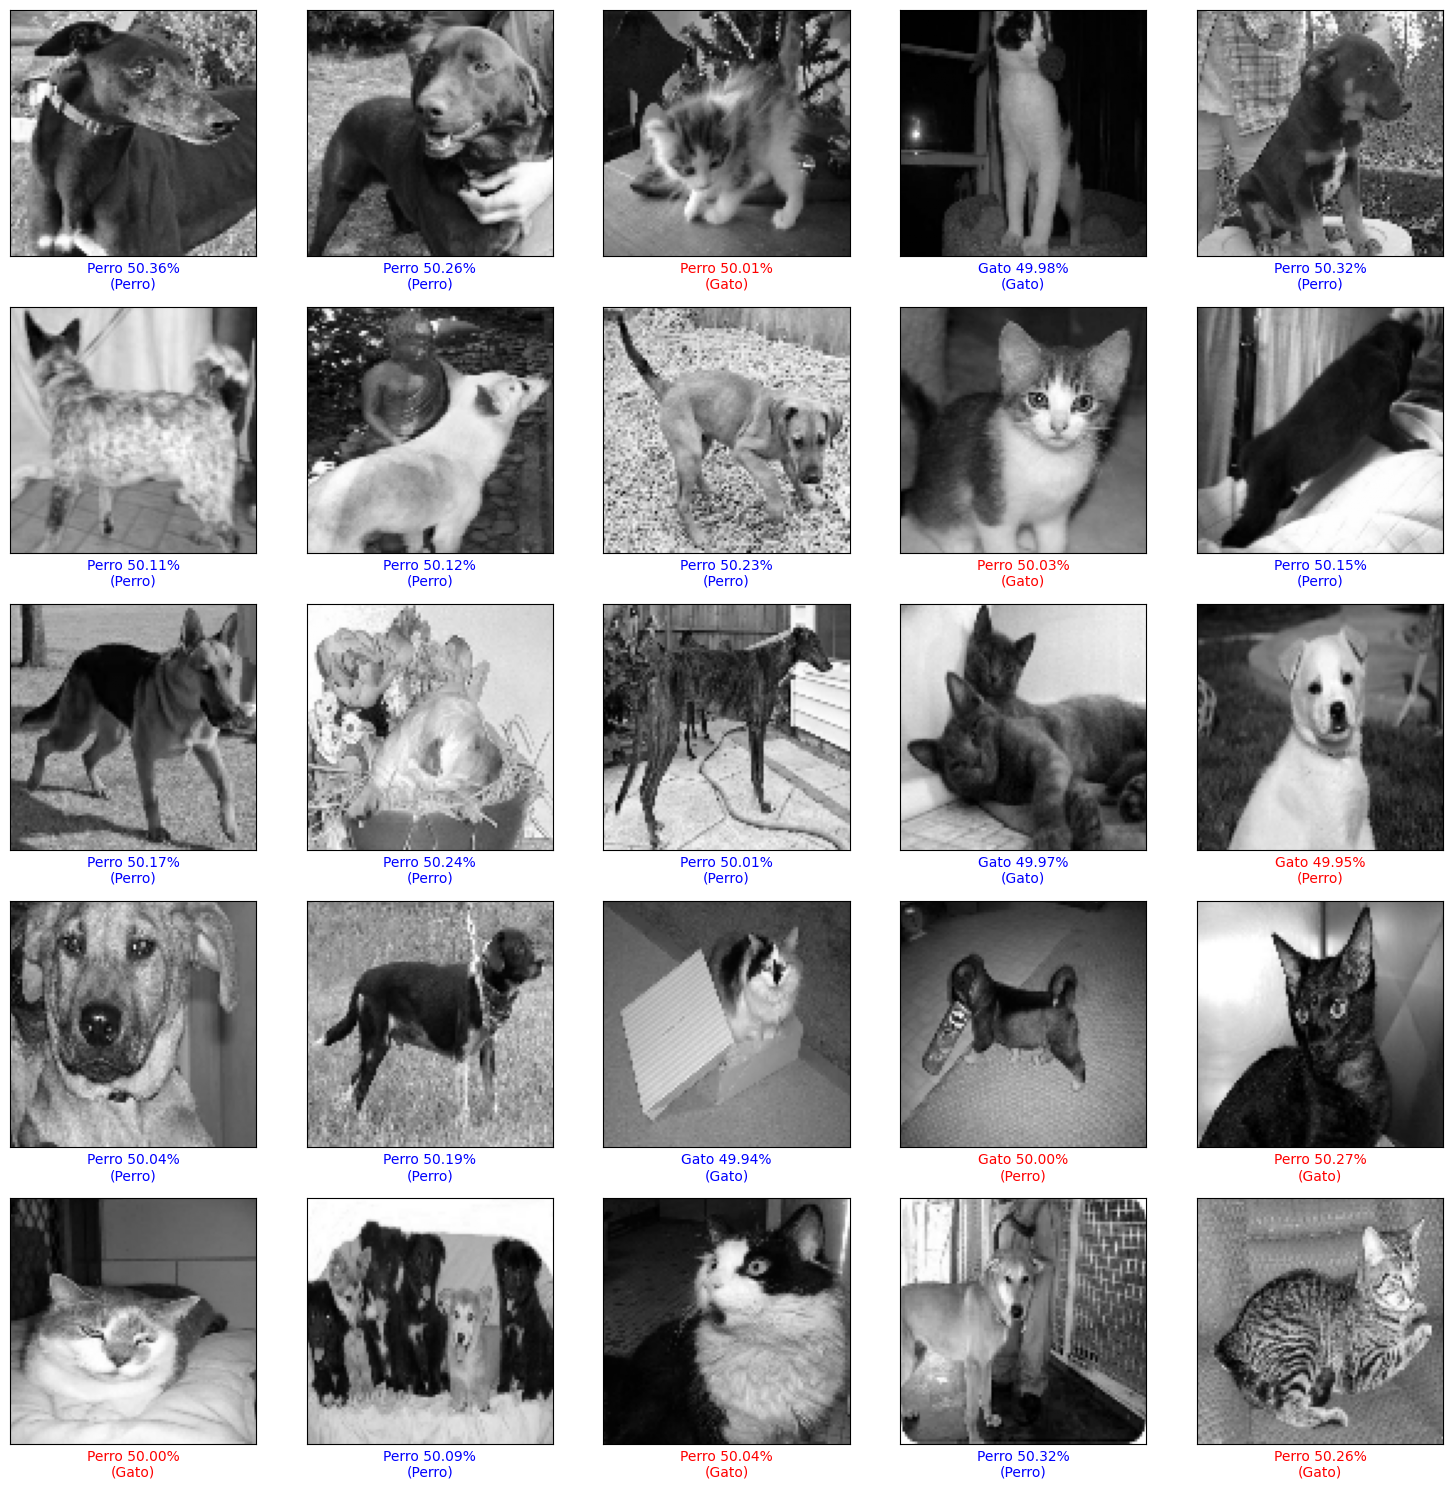

In [ ]:
# 1. Preparar los datos de prueba
datos_pruebas = datos["test"] if "test" in datos else datos["train"].skip(20000)  # en caso no haya set test definido

imagenes_prueba = []
etiquetas_prueba = []

for imagen, etiqueta in datos_pruebas.take(25):
  img = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = img.reshape(TAMANO_IMG, TAMANO_IMG, 1).astype(float) / 255
  imagenes_prueba.append(img)
  etiquetas_prueba.append(etiqueta.numpy())

imagenes_prueba = np.array(imagenes_prueba)
etiquetas_prueba = np.array(etiquetas_prueba)

# 2. Realizar predicciones
predicciones = modelo.predict(imagenes_prueba)
predicciones = predicciones.reshape(-1)  # Aplanamos para simplificar

# 3. Nombres de clases
nombres_clases = ["Gato", "Perro"]

# 4. Función para graficar la imagen y la predicción
def graficar_prediccion(i, imagen, etiqueta_real, prediccion):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen[...,0], cmap="gray")

  prediccion_clase = 1 if prediccion >= 0.5 else 0
  color = "blue" if prediccion_clase == etiqueta_real else "red"

  plt.xlabel(f"{nombres_clases[prediccion_clase]} {prediccion*100:.2f}%\n({nombres_clases[etiqueta_real]})", color=color)

# 5. Mostrar 25 imágenes con su predicción
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5, 5, i+1)
  graficar_prediccion(i, imagenes_prueba[i], etiquetas_prueba[i], predicciones[i])
plt.tight_layout()
plt.show()


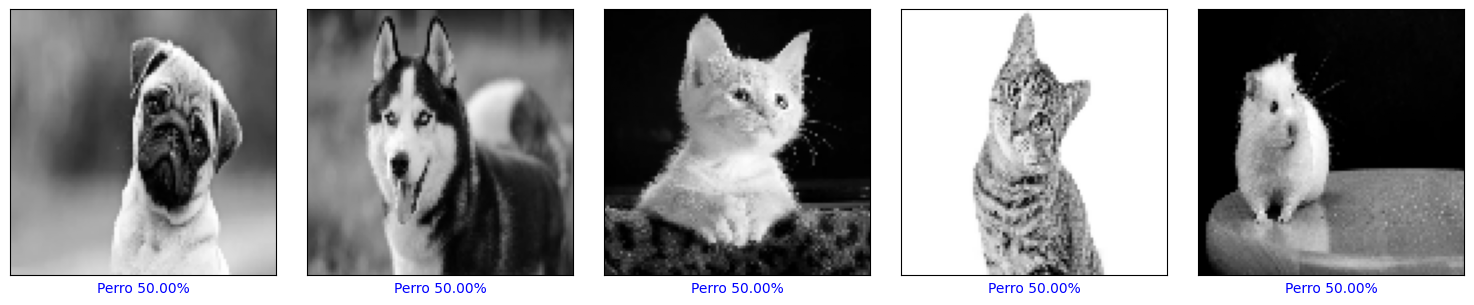

In [ ]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO

# Lista de URLs de las imágenes
urls_imagenes = [
    "https://ichef.bbci.co.uk/ace/ws/640/cpsprodpb/15665/production/_107435678_perro1.jpg.webp",
    "https://cdn0.uncomo.com/es/posts/0/0/3/husky_siberiano_54300_1_600.jpg",
    "https://hospitalveterinariodonostia.com/wp-content/uploads/2022/02/Personalidad-gatos.png",
    "https://s3.abcstatics.com/abc/www/multimedia/sociedad/2024/07/11/gato-RaZLibek03KjY2lBzGD2qEN-1200x840@diario_abc.jpg",
    "https://fotografias.lasexta.com/clipping/cmsimages02/2023/06/09/F22B0FFE-C81A-4D1C-B09C-831917ACD112/que-animales-estan-prohibidos-como-mascotas-nueva-ley-bienestar-animal_98.jpg?crop=3317,1866,x0,y0&width=1900&height=1069&optimize=low&format=webply"
]

# Función para descargar y procesar una imagen desde una URL
def descargar_imagen(url):
    try:
        # Obtener el contenido de la URL
        response = requests.get(url)
        response.raise_for_status()  # Verificar si la respuesta fue exitosa
        # Leer la imagen en memoria
        img_array = np.array(bytearray(response.content), dtype=np.uint8)
        img = cv2.imdecode(img_array, -1)

        if img is None:
            raise ValueError("No se pudo cargar la imagen desde la URL")

        return img
    except Exception as e:
        print(f"Error al descargar o procesar la imagen desde la URL: {url}. Error: {e}")
        return None

# Tamaño de las imágenes
TAMANO_IMG = 100
imagenes_prueba = []
etiquetas_prueba = []  # Asumimos que las etiquetas serán manuales o con base en el nombre de la imagen

# Descargar y procesar cada imagen
for i, url in enumerate(urls_imagenes):
    img = descargar_imagen(url)

    if img is not None:  # Solo procesar si la imagen fue descargada correctamente
        img = cv2.resize(img, (TAMANO_IMG, TAMANO_IMG))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises
        img = img.reshape(TAMANO_IMG, TAMANO_IMG, 1).astype(float) / 255  # Normalizar
        imagenes_prueba.append(img)

        # Asignar etiquetas manualmente, por ejemplo:
        # Etiquetar 0 para gatos y 1 para perros (puedes ajustar según el nombre o alguna lógica que prefieras)
        if "gato" in url.lower():
            etiquetas_prueba.append(0)  # Gato
        else:
            etiquetas_prueba.append(1)  # Perro

# Convertir las listas a arrays de NumPy
imagenes_prueba = np.array(imagenes_prueba)
etiquetas_prueba = np.array(etiquetas_prueba)

# 3. Función para graficar la imagen y la predicción (sin verificar si es correcta)
def graficar_prediccion(i, imagen, prediccion):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[..., 0], cmap="gray")

    prediccion_clase = 1 if prediccion >= 0.5 else 0
    color = "blue"  # No comparamos con la etiqueta real, solo mostramos la predicción

    plt.xlabel(f"{nombres_clases[prediccion_clase]} {prediccion*100:.2f}%", color=color)

# Nombres de las clases
nombres_clases = ["Gato", "Perro"]

# 4. Mostrar 25 imágenes con su predicción
plt.figure(figsize=(15, 15))
for i in range(min(25, len(imagenes_prueba))):  # Limitar a 25 imágenes
    plt.subplot(5, 5, i + 1)
    # Si no tienes un modelo, solo visualizamos las imágenes como ejemplo
    graficar_prediccion(i, imagenes_prueba[i], 0.5)  # Usamos una predicción fija de 0.5 como ejemplo
plt.tight_layout()
plt.show()
